In [1]:
from qiskit import IBMQ                                 # Import IBMQ from Qiskit

In [17]:
IBMQ.save_account('')                                  # saving my account

configrc.store_credentials:WARNING:2022-12-08 12:46:45,759: Credentials already present. Set overwrite=True to overwrite.


In [3]:
provider = IBMQ.load_account()                             # Load account from disk
IBMQ.providers()   

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='qc-fall-22-5', group='group-3', project='rectN0DT2EB4nasfJ')>]

In [4]:
provider = IBMQ.get_provider(hub='ibm-q',group='open', project='main')                  # getting List of providers and backends
provider.backends()  

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
provider = IBMQ.get_provider('ibm-q')                           # Setting our backend and provider
backend = provider.get_backend('ibmq_manila')                   # Taking a real quantum device

In [7]:
backend = provider.get_backend('simulator_statevector')        # Taking a noiseless simulator to work

In [8]:
# Doing One Example

In [9]:
from qiskit import QuantumCircuit, assemble, Aer,transpile                    #Importing the necessary parameters
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


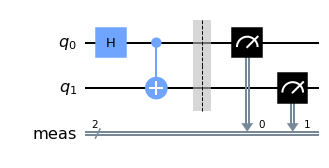

In [10]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw()

In [12]:
from qiskit.tools.monitor import job_monitor

In [14]:
job=backend.run(transpile(qc,backend=backend),shots=1024)
job_monitor(job)

Job Status: job has successfully run


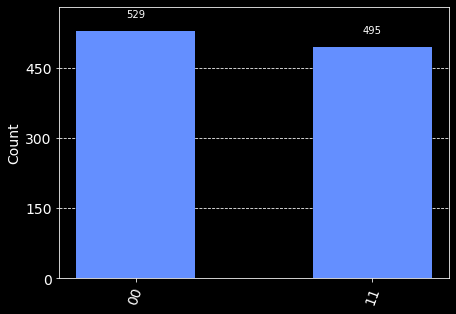

In [15]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plot_histogram(job.result().get_counts())